# 共享單車需求 - 資料前處理
本次的課程將學習如何實作迴歸分析模型，目的是利用時間、季節、是否是特別假日、是否是工作日、天氣狀況、溫度、體感溫度、濕度、風速，來預測每小時的腳踏車數量；藉由此項專案將學會如何使用python裡的套件pandas和numpy來操作資料、並利用matplotlib、seaborn視覺化資料，以及用scikit-learn來建構模型。

---

**1.1 載入所需套件**

---

In [1]:
# 1-1
# 首先載入所需套件，一般會利用import (package_name) as (xxx) 來簡化套件名稱，使得之後呼叫它們時更方便

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import calendar
from datetime import datetime
from sklearn.ensemble import RandomForestRegressor

import warnings
plt.style.use('ggplot')
warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None
%matplotlib inline

---

**1.2 載入資料集**

---

至https://www.kaggle.com/c/bike-sharing-demand/data 下載所需data，共有test、train以及gender_submission三個csv檔

In [2]:
# 1-2
# 可以用pandas裡面的函式來讀取csv檔，使用方法為pd.read_csv('檔案名稱')

# 訓練資料
train = pd.read_csv('train/train.csv')

# 測試資料
test = pd.read_csv('test/test.csv')

---

**1.2 觀察資料分布**

---

In [3]:
train.head(5)

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [4]:
# 1-3
# 使用Info看train, test的資料來觀察是否有空值？
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


In [5]:
# 1-4
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
datetime      6493 non-null object
season        6493 non-null int64
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-null float64
humidity      6493 non-null int64
windspeed     6493 non-null float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.6+ KB


In [6]:
# 1-5
train.describe()

season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.960477    151.039033   
min        0.760000      0.000000      0.000000      0.000000      0.000000   
25%       16.665000     47.000000      7.001500      4.000000     36.000000   
50%       24.240000     62.000000     12.998000     17.000000    118.000000   
75%       31.060000     77.000000     16.997900     49.000000    222.000000   
max       45.455000    100.000000     56.996900    367.000000    886.000000   

              count  
count  10886.000000  
mean     191.574132  
std      181.144454  
min        1.000000  
25%       42.000000  
50%      145.000000  
75%      284.000000  
max      977.000000

---

**1.3 資料處理**

---

In [7]:
# 去除outlier
print ("Shape Of The Before Ouliers: ",train.shape)
train_WithoutOutliers = train[np.abs(train["count"]-train["count"].mean())<=(3*train["count"].std())] 
print ("Shape Of The After Ouliers: ",train_WithoutOutliers.shape)

Shape Of The Before Ouliers:  (10886, 12)
Shape Of The After Ouliers:  (10739, 12)


[Text(0.5, 0, 'count'),
 Text(0.5, 1.0, 'Distribution of count without outliers')]

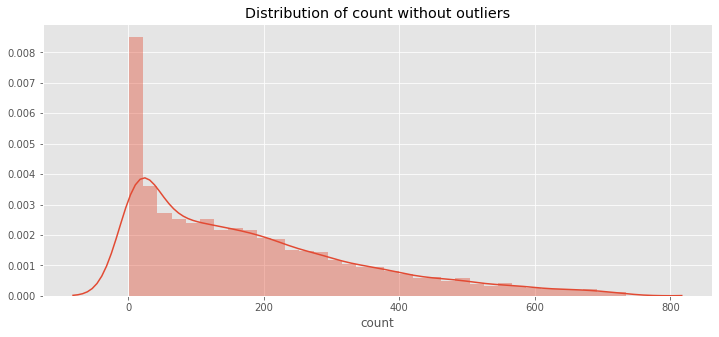

In [8]:
# 觀看密度分佈

fig = plt.figure()
ax = fig.add_subplot()
fig.set_size_inches(12,5)

sns.distplot(train_WithoutOutliers['count'])

ax.set(xlabel='count',title='Distribution of count without outliers')

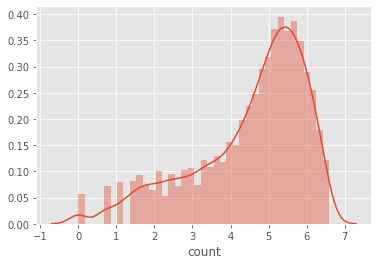

In [9]:
# 可以觀察到數據波動依然很大，而希望波動相對穩定，否則容易產生過擬合，對數據進行變換，使得數據相對穩定，選擇對數變化

yLabels=train_WithoutOutliers['count']
yLabels_log=np.log(yLabels)
sns.distplot(yLabels_log)

In [10]:
# 合併資料
bike_data = train_WithoutOutliers.append(test)
bike_data.reset_index(inplace=True)
bike_data.drop('index',inplace=True,axis=1)

In [11]:
# 轉換格式, 並提取出小時, 星期幾, 月份
bike_data['datetime'] = pd.to_datetime(bike_data['datetime'])
bike_data['hour'] = bike_data.datetime.dt.hour
bike_data['week'] = bike_data.datetime.dt.dayofweek
bike_data['month'] = bike_data.datetime.dt.month
bike_data['year'] = bike_data.datetime.dt.year
bike_data['year_month'] = bike_data.datetime.dt.strftime('%Y-%m')
bike_data['date'] = bike_data.datetime.dt.date

In [12]:
bike_data.head()

atemp  casual  count            datetime  holiday  humidity  registered  \
0  14.395     3.0   16.0 2011-01-01 00:00:00        0        81        13.0   
1  13.635     8.0   40.0 2011-01-01 01:00:00        0        80        32.0   
2  13.635     5.0   32.0 2011-01-01 02:00:00        0        80        27.0   
3  14.395     3.0   13.0 2011-01-01 03:00:00        0        75        10.0   
4  14.395     0.0    1.0 2011-01-01 04:00:00        0        75         1.0   

   season  temp  weather  windspeed  workingday  hour  week  month  year  \
0       1  9.84        1        0.0           0     0     5      1  2011   
1       1  9.02        1        0.0           0     1     5      1  2011   
2       1  9.02        1        0.0           0     2     5      1  2011   
3       1  9.84        1        0.0           0     3     5      1  2011   
4       1  9.84        1        0.0           0     4     5      1  2011   

  year_month        date  
0    2011-01  2011-01-01  
1    2011-01  2011-01-01  
2    2011-01  2011-01-01  
3    2011-01  2011-01-01  
4    2011-01  2011-01-01

[Text(0.5, 0, 'windspeed'), Text(0.5, 1.0, 'Distribution of windspeed')]

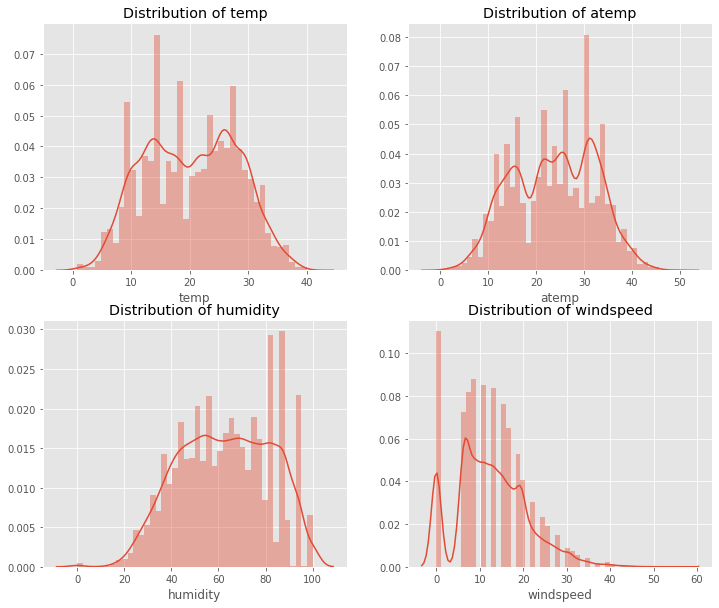

In [13]:
# 觀察上面的數據可以看到temp（溫度），atemp（體感溫度），humidity（濕度）、windspeed（風速）這四列也屬於數值型數據，同樣可以查看一下它們的分佈。

fig, axes = plt.subplots(2, 2)
fig.set_size_inches(12,10)

sns.distplot(bike_data['temp'],ax=axes[0,0])
sns.distplot(bike_data['atemp'],ax=axes[0,1])
sns.distplot(bike_data['humidity'],ax=axes[1,0])
sns.distplot(bike_data['windspeed'],ax=axes[1,1])

axes[0,0].set(xlabel='temp',title='Distribution of temp',)
axes[0,1].set(xlabel='atemp',title='Distribution of atemp')
axes[1,0].set(xlabel='humidity',title='Distribution of humidity')
axes[1,1].set(xlabel='windspeed',title='Distribution of windspeed')

In [14]:
bike_data[bike_data['windspeed']!=0]['windspeed'].describe()

count    15068.000000
mean        14.556762
std          7.092624
min          6.003200
25%          8.998100
50%         12.998000
75%         19.001200
max         56.996900
Name: windspeed, dtype: float64

In [15]:
from sklearn.ensemble import RandomForestRegressor

bike_data["windspeed_rfr"]=bike_data["windspeed"]

# 將數據分成風速等於0和不等於兩部分
dataWind0 = bike_data[bike_data["windspeed_rfr"]==0]
dataWindNot0 = bike_data[bike_data["windspeed_rfr"]!=0]

#選定模型
rfModel_wind = RandomForestRegressor(n_estimators=1000,random_state=42)

# 選定特徵值
windColumns = ["season","weather","humidity","month","temp","year","atemp"]

# 將風速不等於0的數據作為訓練集，fit到RandomForestRegressor之中
rfModel_wind.fit(dataWindNot0[windColumns], dataWindNot0["windspeed_rfr"])

#通過訓練好的模型預測風速
wind0Values = rfModel_wind.predict(X= dataWind0[windColumns])

#將預測的風速填充到風速為零的數據中
dataWind0.loc[:,"windspeed_rfr"] = wind0Values

#連接兩部分數據
bike_data = dataWindNot0.append(dataWind0)
bike_data.reset_index(inplace=True)
bike_data.drop('index',inplace=True,axis=1)

[Text(0.5, 0, 'windseed'), Text(0.5, 1.0, 'Distribution of windspeed')]

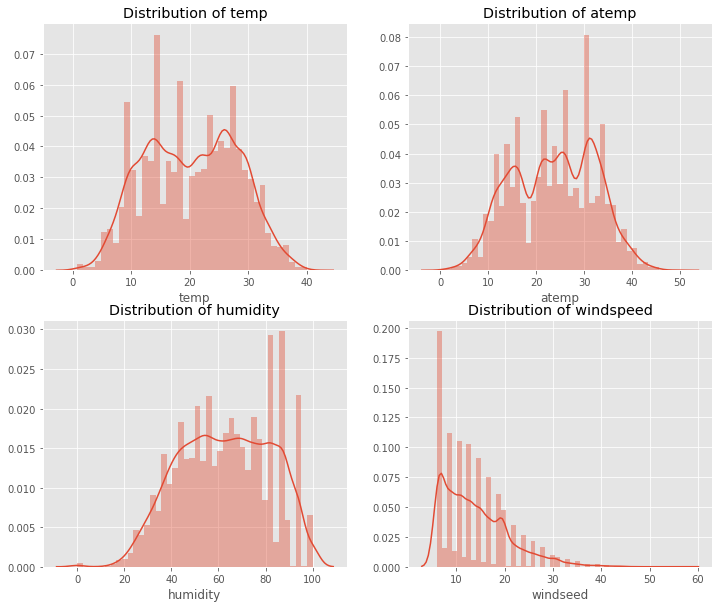

In [16]:
# 填充好再畫圖觀察一下這四個特徵值的密度分佈

fig, axes = plt.subplots(2, 2)
fig.set_size_inches(12,10)

sns.distplot(bike_data['temp'],ax=axes[0,0])
sns.distplot(bike_data['atemp'],ax=axes[0,1])
sns.distplot(bike_data['humidity'],ax=axes[1,0])
sns.distplot(bike_data['windspeed_rfr'],ax=axes[1,1])

axes[0,0].set(xlabel='temp',title='Distribution of temp',)
axes[0,1].set(xlabel='atemp',title='Distribution of atemp')
axes[1,0].set(xlabel='humidity',title='Distribution of humidity')
axes[1,1].set(xlabel='windseed',title='Distribution of windspeed')

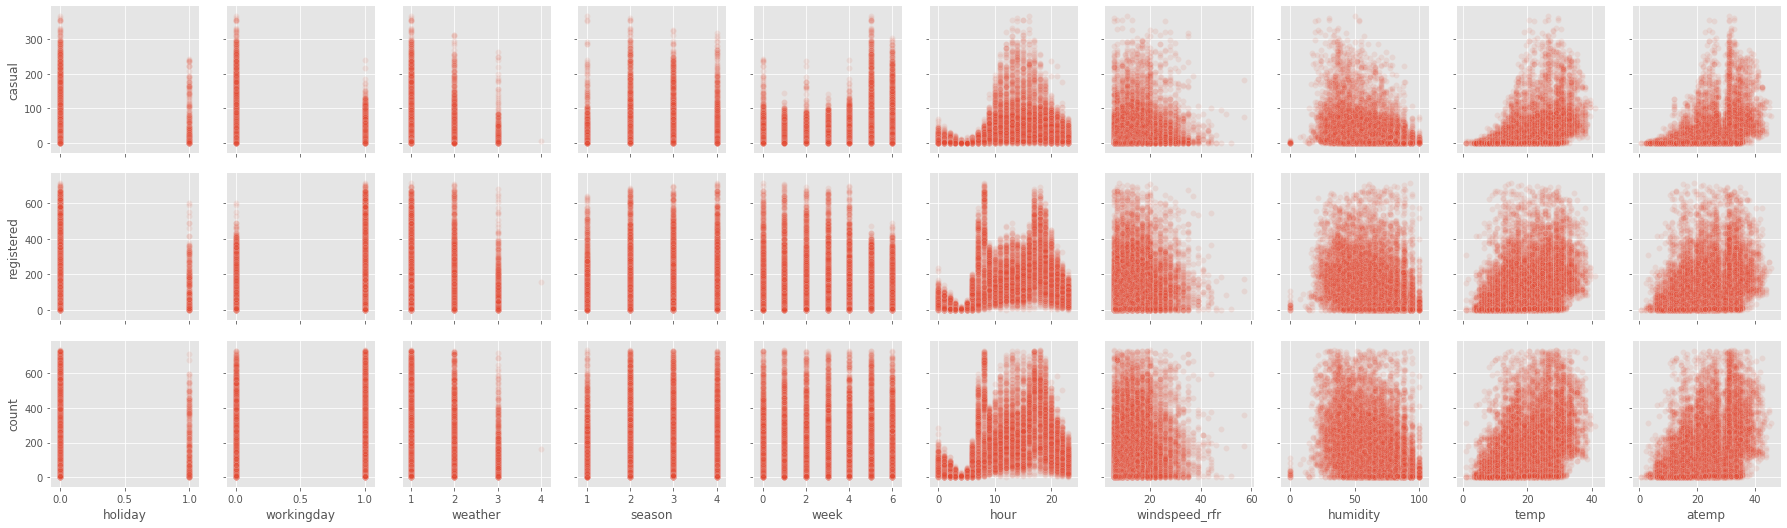

In [17]:
sns.pairplot(bike_data ,x_vars=['holiday','workingday','weather','season',
                                'week','hour','windspeed_rfr','humidity','temp','atemp'] ,
                        y_vars=['casual','registered','count'] , plot_kws={'alpha': 0.1})

- 1.會員在工作日出行多，節假日出行少，臨時用戶則相反；
- 2.一季度出行人數總體偏少；
- 3.租賃數量隨天氣等級上升而減少；
- 4.小時數對租賃情況影響明顯，會員呈現兩個高峰，非會員呈現一個正態分佈；
- 5.租賃數量隨風速增大而減少；
- 6.溫度、濕度對非會員影響比較大，對會員影響較小

In [18]:
#相關性矩陣
corrDf = bike_data.corr()

#ascending=False表示按降序排列
corrDf['count'].sort_values(ascending =False)

count            1.000000
registered       0.966209
casual           0.704764
hour             0.405437
temp             0.385954
atemp            0.381967
year             0.234959
month            0.164673
season           0.159801
windspeed_rfr    0.111783
windspeed        0.106074
week             0.022602
holiday          0.002978
workingday      -0.020764
weather         -0.127519
humidity        -0.317028
Name: count, dtype: float64

可以看出特徵值對租賃數量的影響力度為,時段>溫度>濕度>年份>月份>季節>天氣等級>風速>星期幾>是否工作日>是否假日，接下來再看一下共享單車整體使用情況。

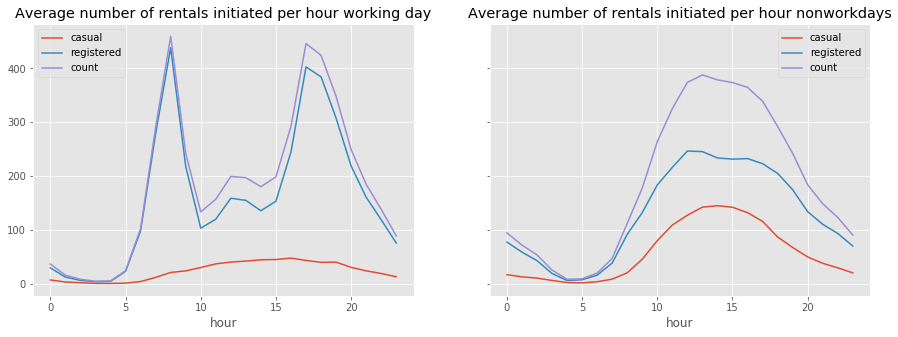

In [19]:
workingday_df=bike_data[bike_data['workingday']==1]
workingday_df = workingday_df.groupby(['hour'], as_index=True).agg({'casual':'mean',
                                                                    'registered':'mean',
                                                                    'count':'mean'})

nworkingday_df=bike_data[bike_data['workingday']==0]
nworkingday_df = nworkingday_df.groupby(['hour'], as_index=True).agg({'casual':'mean',
                                                                      'registered':'mean', 
                                                                      'count':'mean'})
fig, axes = plt.subplots(1, 2,sharey = True)

workingday_df.plot(figsize=(15,5),title = 'Average number of rentals initiated per hour working day',ax=axes[0])
nworkingday_df.plot(figsize=(15,5),title = 'Average number of rentals initiated per hour nonworkdays',ax=axes[1])

- 1.工作日對於會員用戶上下班時間是兩個用車高峰，而中午也會有一個小高峰，猜測可能是外出午餐的人；
- 2.而對臨時用戶起伏比較平緩，高峰期在17點左右；
- 3.並且會員用戶的用車數量遠超過臨時用戶。
- 4.對非工作日而言租賃數量隨時間呈現一個正態分佈，高峰在14點左右，低谷在4點左右，且分佈比較均勻。

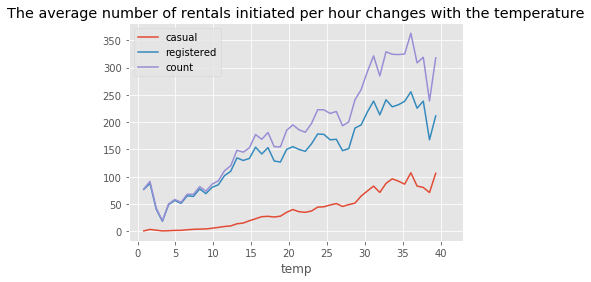

In [20]:
# 按温度取租赁额平均值
temp_rentals = bike_data.groupby(['temp'], as_index=True).agg({'casual':'mean', 
                                                               'registered':'mean',
                                                               'count':'mean'})
temp_rentals.plot(title = 'The average number of rentals initiated per hour changes with the temperature')

In [21]:
day_df = bike_data.groupby(['date'], as_index=False).agg({'casual':'sum','registered':'sum',
                                                          'count':'sum', 'workingday':'mean',
                                                          'week':'mean','holiday':'mean',
                                                          'year':'mean'})
day_df.head()

date  casual  registered   count  workingday  week  holiday  year
0  2011-01-01   331.0       654.0   985.0           0     5        0  2011
1  2011-01-02   131.0       670.0   801.0           0     6        0  2011
2  2011-01-03   120.0      1229.0  1349.0           1     0        0  2011
3  2011-01-04   108.0      1454.0  1562.0           1     1        0  2011
4  2011-01-05    82.0      1518.0  1600.0           1     2        0  2011

In [22]:
number_pei=day_df[['casual','registered']].mean()
number_pei

casual         517.411765
registered    2171.067031
dtype: float64

Text(0.5, 1.0, 'Casual or registered in the total lease')

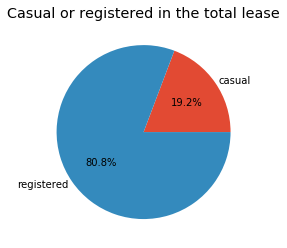

In [23]:
plt.axes(aspect='equal')  
plt.pie(number_pei, labels=['casual','registered'], autopct='%1.1f%%', 
        pctdistance=0.6 , labeldistance=1.05 , radius=1 )  
plt.title('Casual or registered in the total lease')

----

In [24]:
dummies_month = pd.get_dummies(bike_data['month'], prefix= 'month')
dummies_season=pd.get_dummies(bike_data['season'],prefix='season')
dummies_weather=pd.get_dummies(bike_data['weather'],prefix='weather')
dummies_year=pd.get_dummies(bike_data['year'],prefix='year')

# 把5個新的DF和原來的表連接起來
Bike_data=pd.concat([bike_data,dummies_month,dummies_season,dummies_weather,dummies_year],axis=1)

In [25]:
# 分離訓練集和測試集

dataTrain = Bike_data[pd.notnull(Bike_data['count'])]
dataTest= Bike_data[~pd.notnull(Bike_data['count'])].sort_values(by=['datetime'])
datetimecol = dataTest['datetime']
yLabels=dataTrain['count']
yLabels_log=np.log(yLabels)

In [26]:
dataTrain.head()

atemp  casual  count            datetime  holiday  humidity  registered  \
0  12.880     0.0    1.0 2011-01-01 05:00:00        0        75         1.0   
1  19.695    12.0   36.0 2011-01-01 10:00:00        0        76        24.0   
2  16.665    26.0   56.0 2011-01-01 11:00:00        0        81        30.0   
3  21.210    29.0   84.0 2011-01-01 12:00:00        0        77        55.0   
4  22.725    47.0   94.0 2011-01-01 13:00:00        0        72        47.0   

   season   temp  weather    ...      season_1  season_2  season_3  season_4  \
0       1   9.84        2    ...             1         0         0         0   
1       1  15.58        1    ...             1         0         0         0   
2       1  14.76        1    ...             1         0         0         0   
3       1  17.22        1    ...             1         0         0         0   
4       1  18.86        2    ...             1         0         0         0   

   weather_1  weather_2 weather_3 weather_4  year_2011  year_2012  
0          0          1         0         0          1          0  
1          1          0         0         0          1          0  
2          1          0         0         0          1          0  
3          1          0         0         0          1          0  
4          0          1         0         0          1          0  

[5 rows x 41 columns]

In [27]:
# 把不要的列丢弃

dropFeatures = ['casual', 'datetime' , 'date' , 'registered' ,
                'windspeed' , 'atemp' , 'month','season','weather', 'year','year_month' ]

In [28]:
dataTrain = dataTrain.drop(dropFeatures , axis=1)
dataTest = dataTest.drop(dropFeatures , axis=1) 

In [29]:
dataTrain.head()

count  holiday  humidity   temp  workingday  hour  week  windspeed_rfr  \
0    1.0        0        75   9.84           0     5     5         6.0032   
1   36.0        0        76  15.58           0    10     5        16.9979   
2   56.0        0        81  14.76           0    11     5        19.0012   
3   84.0        0        77  17.22           0    12     5        19.0012   
4   94.0        0        72  18.86           0    13     5        19.9995   

   month_1  month_2    ...      season_1  season_2  season_3  season_4  \
0        1        0    ...             1         0         0         0   
1        1        0    ...             1         0         0         0   
2        1        0    ...             1         0         0         0   
3        1        0    ...             1         0         0         0   
4        1        0    ...             1         0         0         0   

   weather_1  weather_2  weather_3  weather_4  year_2011  year_2012  
0          0          1          0          0          1          0  
1          1          0          0          0          1          0  
2          1          0          0          0          1          0  
3          1          0          0          0          1          0  
4          0          1          0          0          1          0  

[5 rows x 30 columns]

In [30]:
# model selection
from sklearn.model_selection import train_test_split,cross_validate

x_train,x_test,y_train,y_test=train_test_split(dataTrain.drop('count',axis=1),dataTrain['count'],test_size=0.25,random_state=42)

In [31]:
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error

models=[RandomForestRegressor(),AdaBoostRegressor(),BaggingRegressor(),SVR(),KNeighborsRegressor()]
model_names=['RandomForestRegressor','AdaBoostRegressor','BaggingRegressor','SVR','KNeighborsRegressor']
rmsle=[]
d={}
for model in range (len(models)):
    clf=models[model]
    clf.fit(x_train,y_train)
    test_pred=clf.predict(x_test)
    rmsle.append(np.sqrt(mean_squared_log_error(test_pred,y_test)))
d={'Modelling Algo':model_names,'RMSLE':rmsle}   
d

{'Modelling Algo': ['RandomForestRegressor',
  'AdaBoostRegressor',
  'BaggingRegressor',
  'SVR',
  'KNeighborsRegressor'],
 'RMSLE': [0.33452128723210167,
  0.934746721073003,
  0.3376021479645469,
  1.347519565395393,
  0.7908677985633341]}

In [33]:
rmsle_frame=pd.DataFrame(d)
rmsle_frame

Modelling Algo     RMSLE
0  RandomForestRegressor  0.334521
1      AdaBoostRegressor  0.934747
2       BaggingRegressor  0.337602
3                    SVR  1.347520
4    KNeighborsRegressor  0.790868

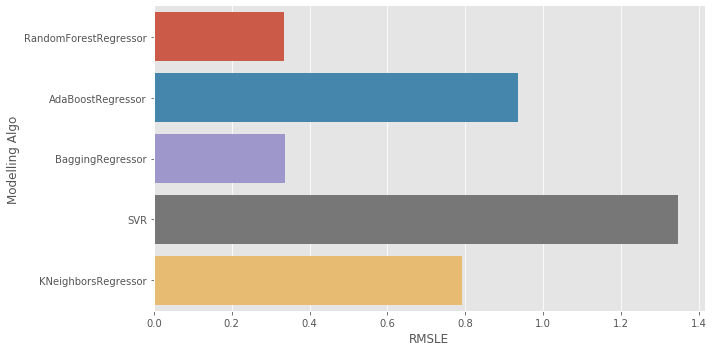

In [34]:
sns.factorplot(y='Modelling Algo',x='RMSLE',data=rmsle_frame,kind='bar',size=5,aspect=2)

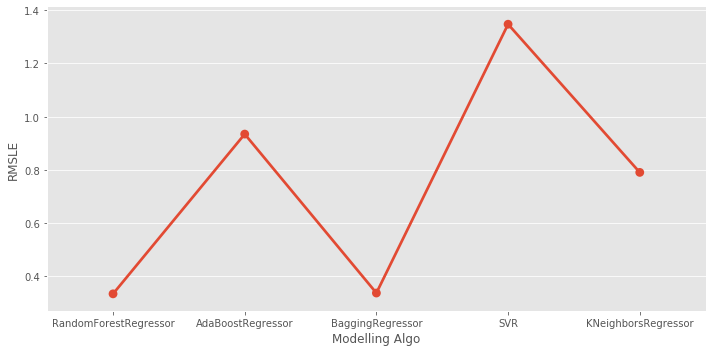

In [35]:
sns.factorplot(x='Modelling Algo',y='RMSLE',data=rmsle_frame,kind='point',size=5,aspect=2)


In [37]:
# for random forest regresion.
from sklearn.model_selection import GridSearchCV


no_of_test=[500]
params_dict={'n_estimators':no_of_test,'n_jobs':[-1],'max_features':["auto",'sqrt','log2']}
clf_rf=GridSearchCV(estimator=RandomForestRegressor(),param_grid=params_dict,scoring='neg_mean_squared_log_error')
clf_rf.fit(x_train,y_train)
pred=clf_rf.predict(x_test)
print((np.sqrt(mean_squared_log_error(pred,y_test))))

0.3220323085056914


In [40]:
dropCount = ['count']

In [41]:
dataTrain = dataTrain.drop(dropCount , axis=1)
dataTest = dataTest.drop(dropCount , axis=1) 

In [42]:
dataTrain.head()

holiday  humidity   temp  workingday  hour  week  windspeed_rfr  month_1  \
0        0        75   9.84           0     5     5         6.0032        1   
1        0        76  15.58           0    10     5        16.9979        1   
2        0        81  14.76           0    11     5        19.0012        1   
3        0        77  17.22           0    12     5        19.0012        1   
4        0        72  18.86           0    13     5        19.9995        1   

   month_2  month_3    ...      season_1  season_2  season_3  season_4  \
0        0        0    ...             1         0         0         0   
1        0        0    ...             1         0         0         0   
2        0        0    ...             1         0         0         0   
3        0        0    ...             1         0         0         0   
4        0        0    ...             1         0         0         0   

   weather_1  weather_2  weather_3  weather_4  year_2011  year_2012  
0          0          1          0          0          1          0  
1          1          0          0          0          1          0  
2          1          0          0          0          1          0  
3          1          0          0          0          1          0  
4          0          1          0          0          1          0  

[5 rows x 29 columns]

In [43]:
dataTest.head()

holiday  humidity   temp  workingday  hour  week  windspeed_rfr  \
9442         0        56  10.66           1     0     3      26.002700   
16365        0        56  10.66           1     1     3       8.784978   
16366        0        56  10.66           1     2     3       8.784978   
9443         0        56  10.66           1     3     3      11.001400   
9444         0        56  10.66           1     4     3      11.001400   

       month_1  month_2  month_3    ...      season_1  season_2  season_3  \
9442         1        0        0    ...             1         0         0   
16365        1        0        0    ...             1         0         0   
16366        1        0        0    ...             1         0         0   
9443         1        0        0    ...             1         0         0   
9444         1        0        0    ...             1         0         0   

       season_4  weather_1  weather_2  weather_3  weather_4  year_2011  \
9442          0          1          0          0          0          1   
16365         0          1          0          0          0          1   
16366         0          1          0          0          0          1   
9443          0          1          0          0          0          1   
9444          0          1          0          0          0          1   

       year_2012  
9442           0  
16365          0  
16366          0  
9443           0  
9444           0  

[5 rows x 29 columns]

In [49]:
predsTest= clf_rf.predict(X = dataTest)

submission=pd.DataFrame({'datetime':datetimecol , 'count':[max(0,x) for x in predsTest]})

submission.to_csv('bike_predictions2.csv',index=False)

----------

In [45]:
rfModel = RandomForestRegressor(n_estimators=1000 , random_state = 42)

rfModel.fit(dataTrain , yLabels_log)

preds = rfModel.predict( X = dataTrain)

In [48]:
predsTest= rfModel.predict(X = dataTest)

submission=pd.DataFrame({'datetime':datetimecol , 'count':[max(0,x) for x in np.exp(predsTest)]})

submission.to_csv('bike_predictions1.csv',index=False)